# Multilayer Perceptrons
> Multilayer Perceptrons

- toc: true 
- badges: true
- comments: true
- categories: [Machine Learning, Multilayer Perceptrons]

Multilayer Perceptrons is a truly deep netwok. This is a simplest deep network consist of multiple layers of neurons each fully connected to those in the layer below and those abuse.

# Hidden Layers

![](my_icons/mlp.svg)

We can overcome the limitations of linear models and handle more general class of functions by incorporating one or more hiddn layers. 

# Activation Functions

In order to realize the potential of multilayer architectures, we need one more key ingredient: a nonlinear `activation function` 

$$\begin{split}\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}\end{split}$$

## ReLU Function

$$ReLU(x) = max(x,0)$$

[Text(0.5, 0, 'x'), Text(0, 0.5, 'ReLU')]

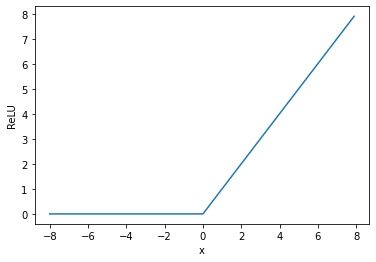

In [22]:
#hide_input
import tensorflow as tf
import seaborn as sns
x = tf.Variable(tf.range(-8.0, 8.0, 0.1), dtype=tf.float32)
y = tf.nn.relu(x)
sns.lineplot(x=x.numpy(), y=y.numpy()).set( xlabel='x', ylabel='ReLU')

# Sigmoid Function

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

[Text(0.5, 0, 'x'), Text(0, 0.5, 'Sigmoid')]

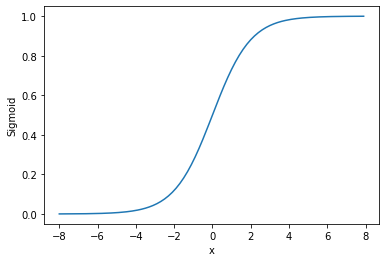

In [27]:
y = tf.nn.sigmoid(x)
sns.lineplot(x=x.numpy(), y=y.numpy()).set( xlabel='x', ylabel='Sigmoid')

# Tanh Function

[Text(0.5, 0, 'x'), Text(0, 0.5, 'Tanh')]

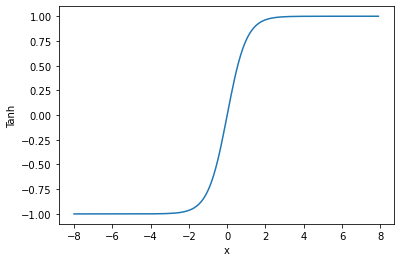

In [30]:
y = tf.nn.tanh(x)
sns.lineplot(x=x.numpy(), y=y.numpy()).set( xlabel='x', ylabel='Tanh')

# Implement Multilayer Percemtrons from Scartch

In [33]:
from d2l import tensorflow as d2l
import tensorflow as tf

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# Initializing Parameters

In [34]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = tf.Variable(tf.random.normal(
    shape=(num_inputs, num_hiddens), mean=0, stddev=0.01))
b1 = tf.Variable(tf.zeros(num_hiddens))
W2 = tf.Variable(tf.random.normal(
    shape=(num_hiddens, num_outputs), mean=0, stddev=0.01))
b2 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))

params = [W1, b1, W2, b2]

# Activation Function

In [36]:
def relu(X):
    return tf.math.maximum(X,0)

# Model

In [38]:
def net(X):
    X = tf.reshape(X, (-1, num_inputs))
    H = relu(tf.matmul(X, W1) + b1)
    return tf.matmul(H, W2) + b2

# Loss Function

In [40]:
def loss(y_hat, y):
    return tf.losses.sparse_categorical_crossentropy(
        y, y_hat, from_logits=True)

# Training

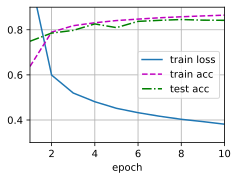

In [42]:
num_epochs, lr = 10, 0.1
updater = d2l.Updater([W1, W2, b1, b2], lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)